In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from math import tanh, exp

In [13]:
width = 64
height = 64
max_iter_time = 500

diffCoef = 0.01
C_m = 1.0

dx = 64 / width
dy = 64 / height

cddx = (1 / dx) ** 2
cddy = (1 / dy) ** 2

dt = 1

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, width, height))
v = np.empty((max_iter_time, width, height))
w = np.empty((max_iter_time, width, height))

# Initial condition everywhere inside the grid
u_initial = 0
u_initial = np.random.uniform(low=28.5, high=55.5, size=(width, height))

# Boundary conditions
u_top = 80.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
# u.fill(u_initial)

# Set the boundary conditions
# u[:, (height-1):, :] = u_top
# u[:, :, :1] = u_left
# u[:, :1, 1:] = u_bottom
# u[:, :, (width-1):] = u_right

u[0, :, :] = u_initial

In [14]:
u.sum()

171957.04485383147

In [15]:
def calculate(u):
    for t in range(0, max_iter_time-1, 1):
        for i in range(1, int(width / dx) - 1):
            for j in range(1, int(height / dy) -1):
                p = 0
                q = 1.0
                if (u[t, i, j] >= 0.25):
                    p = 1.0
                if (u[t, i, j] >= 0.0025):
                    q = 0

                Ifi = -v[t, i, j] * p * (u[t, i, j] - 0.1) * (0.97 - u[t, i, j]) / 0.175
                Iso = u[t, i, j] * (1.0 - p) * (1.0 - v[t, i, j]) / 4.5  + p / (5.0 + 15.0 * (1.0 - tanh(50.0 * (u[t, i, j] - 0.85))))
                Isi = -w[t, i, j] * ((1.0 - tanh(10.0 * (u[t, i, j] - 0.9))) / 2.0) * (1.0 + tanh(7. * (u[t, i, j] - 0.35))) / ((2.0 * 15.5) * (1.0 + exp((u[t, i, j] - 0.9) * 4.5)))

                if (u[t, i, j] < 0.05):
                    Isi = 0.0

                du2dt = ((u[t, i+1, j] - 2 * u[t, i, j] + u[t, i-1, j]) * cddx + (u[t, i, j+1] - 2 * u[t, i, j] + u[t, i, j-1]) * cddy) * diffCoef
                du2dt -= (Ifi + Iso + Isi) / C_m
                dv2dt = (1.0 - p) * (1.0 - v[t, i, j])/ (40.0 * q + (1.0 - q) * 2000.0)  - p * v[t, i, j] / 10.0
                dw2dt = (1.0 - p) * (1.0 - w[t, i, j] * w[t, i, j] * w[t, i, j] * w[t, i, j]) / 305.0  - p * w[t, i, j] / 320.0

                u[t+1, i, j] = u[t, i, j] + du2dt * dt
                v[t+1, i, j] = v[t, i, j] + dv2dt * dt
                w[t+1, i, j] = w[t, i, j] + dw2dt * dt
    return u

# Do the calculation here
u = calculate(u)

In [16]:
u.sum()

16200191.694922384

Done!


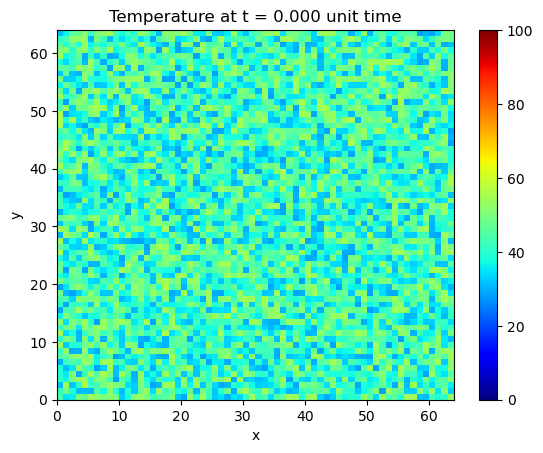

In [17]:
def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*dt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("cable_equation_solution.gif")

print("Done!")